## Importing Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Data Preprocessing

### Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/plant/plant-moni/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 14523 files belonging to 10 classes.


### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/plant/plant-moni/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5537 files belonging to 10 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[119.   114.   134.  ]
   [132.75 127.75 147.75]
   [100.25  95.25 115.25]
   ...
   [172.75 173.75 193.75]
   [164.75 165.75 185.75]
   [164.75 165.75 185.75]]

  [[118.   113.   133.  ]
   [124.25 119.25 139.25]
   [123.   118.   138.  ]
   ...
   [169.   170.   190.  ]
   [170.75 171.75 191.75]
   [165.75 166.75 186.75]]

  [[135.75 130.75 150.75]
   [121.75 116.75 136.75]
   [119.   114.   134.  ]
   ...
   [168.5  169.5  189.5 ]
   [176.   177.   197.  ]
   [175.5  176.5  196.5 ]]

  ...

  [[186.25 182.25 197.25]
   [149.25 145.25 160.25]
   [154.5  151.5  168.5 ]
   ...
   [205.5  203.5  216.5 ]
   [206.   204.   217.  ]
   [203.25 201.25 214.25]]

  [[153.75 147.75 161.75]
   [154.75 150.75 165.75]
   [153.75 149.75 164.75]
   ...
   [199.   197.   210.  ]
   [198.75 196.75 209.75]
   [202.25 200.25 213.25]]

  [[174.25 168.25 182.25]
   [144.75 138.75 152.75]
   [164.25 160.25 175.25]
   ...
   [201.5  199.5  212.5 ]
   [202.25 200.25 213.25]
   [200.75 198.75 21

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()

In [10]:
## Building Convolution Layer

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
#Output Layer
model.add(Dense(units=10,activation='softmax'))

### Compiling Model

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,800,734 (29.76 MB)

 Trainable params: 7,800,734 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [25]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 54s 118ms/step - accuracy: 0.9747 - loss: 0.0688 - val_accuracy: 0.7047 - val_loss: 3.2205
Epoch 2/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 56s 123ms/step - accuracy: 0.9803 - loss: 0.0631 - val_accuracy: 0.7381 - val_loss: 2.7064
Epoch 3/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 57s 126ms/step - accuracy: 0.9837 - loss: 0.0526 - val_accuracy: 0.7370 - val_loss: 2.5949
Epoch 4/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 83s 128ms/step - accuracy: 0.9843 - loss: 0.0458 - val_accuracy: 0.7399 - val_loss: 2.8773
Epoch 5/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 62s 137ms/step - accuracy: 0.9816 - loss: 0.0571 - val_accuracy: 0.7128 - val_loss: 2.1936
Epoch 6/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 54s 120ms/step - accuracy: 0.9864 - loss: 0.0431 - val_accuracy: 0.7313 - val_loss: 2.3002
Epoch 7/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 54s 120ms/step - accuracy: 0.9854 - loss: 0.0454 - val_accuracy: 0.7408 - val_loss: 2.7393
Epoch 8/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 87s 131ms/step - accuracy: 0.9927 - loss: 0

## Model Evaluation

In [26]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

454/454 ━━━━━━━━━━━━━━━━━━━━ 39s 86ms/step - accuracy: 0.9771 - loss: 0.0861


In [27]:
print(train_loss,train_acc)

0.07685095816850662 0.9787922501564026


In [28]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

174/174 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.7144 - loss: 3.0991


In [29]:
print(val_loss,val_acc)

3.0562431812286377 0.7175365686416626


### Saving Model

In [35]:
model.save("my_model.h5")

In [36]:
training_history.history

{'accuracy': [0.9781036972999573,
  0.9802382588386536,
  0.9796185493469238,
  0.9849893450737,
  0.9789299964904785,
  0.9845073223114014,
  0.9859533309936523,
  0.9909109473228455,
  0.9871927499771118,
  0.9882255792617798],
 'loss': [0.06090814620256424,
  0.0614943765103817,
  0.062383342534303665,
  0.044797707349061966,
  0.0650181993842125,
  0.052243854850530624,
  0.044327300041913986,
  0.029641123488545418,
  0.039763275533914566,
  0.03570546954870224],
 'val_accuracy': [0.704713761806488,
  0.7381253242492676,
  0.737041711807251,
  0.7399313449859619,
  0.7128409147262573,
  0.7312624454498291,
  0.7408344149589539,
  0.731623649597168,
  0.731623649597168,
  0.7175365686416626],
 'val_loss': [3.22052001953125,
  2.7064461708068848,
  2.5948522090911865,
  2.877272605895996,
  2.193626642227173,
  2.300238609313965,
  2.739297389984131,
  2.5736043453216553,
  2.3596487045288086,
  3.0562424659729004]}

In [37]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [38]:
training_history.history['val_accuracy']

[0.704713761806488,
 0.7381253242492676,
 0.737041711807251,
 0.7399313449859619,
 0.7128409147262573,
 0.7312624454498291,
 0.7408344149589539,
 0.731623649597168,
 0.731623649597168,
 0.7175365686416626]

### Accuracy Visualization

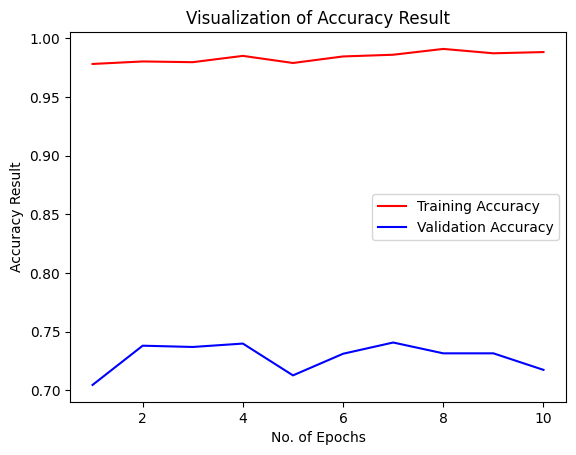

In [39]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [40]:
class_name = validation_set.class_names
class_name

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [42]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/plant/plant-moni/valid', # Changed the path to include the full path
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5537 files belonging to 10 classes.


In [43]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

174/174 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step


(array([[9.99998331e-01, 4.26934887e-09, 1.18352705e-08, ...,
         1.05937704e-06, 2.40647433e-11, 3.09504838e-10],
        [1.00000000e+00, 2.68100282e-11, 8.64043754e-13, ...,
         1.76524489e-10, 1.42993813e-16, 8.21001168e-15],
        [1.00000000e+00, 8.08840286e-11, 2.23289421e-12, ...,
         9.26914323e-10, 2.81451667e-14, 1.26592031e-12],
        ...,
        [2.66004587e-08, 5.76667360e-12, 3.62588764e-07, ...,
         6.03598352e-11, 3.43057110e-11, 9.99999642e-01],
        [1.95661602e-08, 3.70165487e-12, 4.59791671e-09, ...,
         1.10297958e-10, 1.74165907e-11, 9.99999762e-01],
        [1.72541537e-09, 1.05281936e-10, 1.59473608e-08, ...,
         3.00436759e-10, 4.40557979e-10, 9.99968767e-01]], dtype=float32),
 (5537, 10))

In [44]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [45]:
predicted_categories

<tf.Tensor: shape=(5537,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9])>

In [46]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(5537, 10), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [47]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(5537,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9])>

![image.png](attachment:f464cbcc-5d6b-4f32-835c-9aabe0f9c5d4.png)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.95      0.99      0.97       425
                        Tomato___Early_blight       0.81      0.68      0.74       480
                         Tomato___Late_blight       0.62      0.97      0.76       463
                           Tomato___Leaf_Mold       0.73      0.75      0.74       470
                  Tomato___Septoria_leaf_spot       0.54      0.89      0.67       436
Tomato___Spider_mites Two-spotted_spider_mite       0.95      0.28      0.43      1387
                         Tomato___Target_Spot       0.66      0.89      0.76       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.94      1.00      0.97       490
                 Tomato___Tomato_mosaic_virus       0.46      0.84      0.59       448
                             Tomato___healthy       0.95      0.80      0.87       481

                                     accu

In [50]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[421,   0,   1,   0,   0,   0,   3,   0,   0,   0],
       [  9, 325, 114,   0,   9,   2,   9,   9,   3,   0],
       [  0,  10, 447,   0,   4,   0,   1,   0,   0,   1],
       [  0,   9,  30, 351,  28,   6,   3,   8,  33,   2],
       [  3,   8,  17,   0, 387,   1,  10,   0,  10,   0],
       [  7,  33,  69, 123, 264, 383,  88,   9, 397,  14],
       [  4,   7,  19,   0,   9,   1, 408,   0,   8,   1],
       [  0,   0,   0,   0,   0,   0,   0, 490,   0,   0],
       [  0,   9,   6,   9,  12,   9,  21,   4, 377,   1],
       [  0,   1,  15,   0,   2,   1,  78,   0,   0, 384]])

### Confusion Matrix Visualization

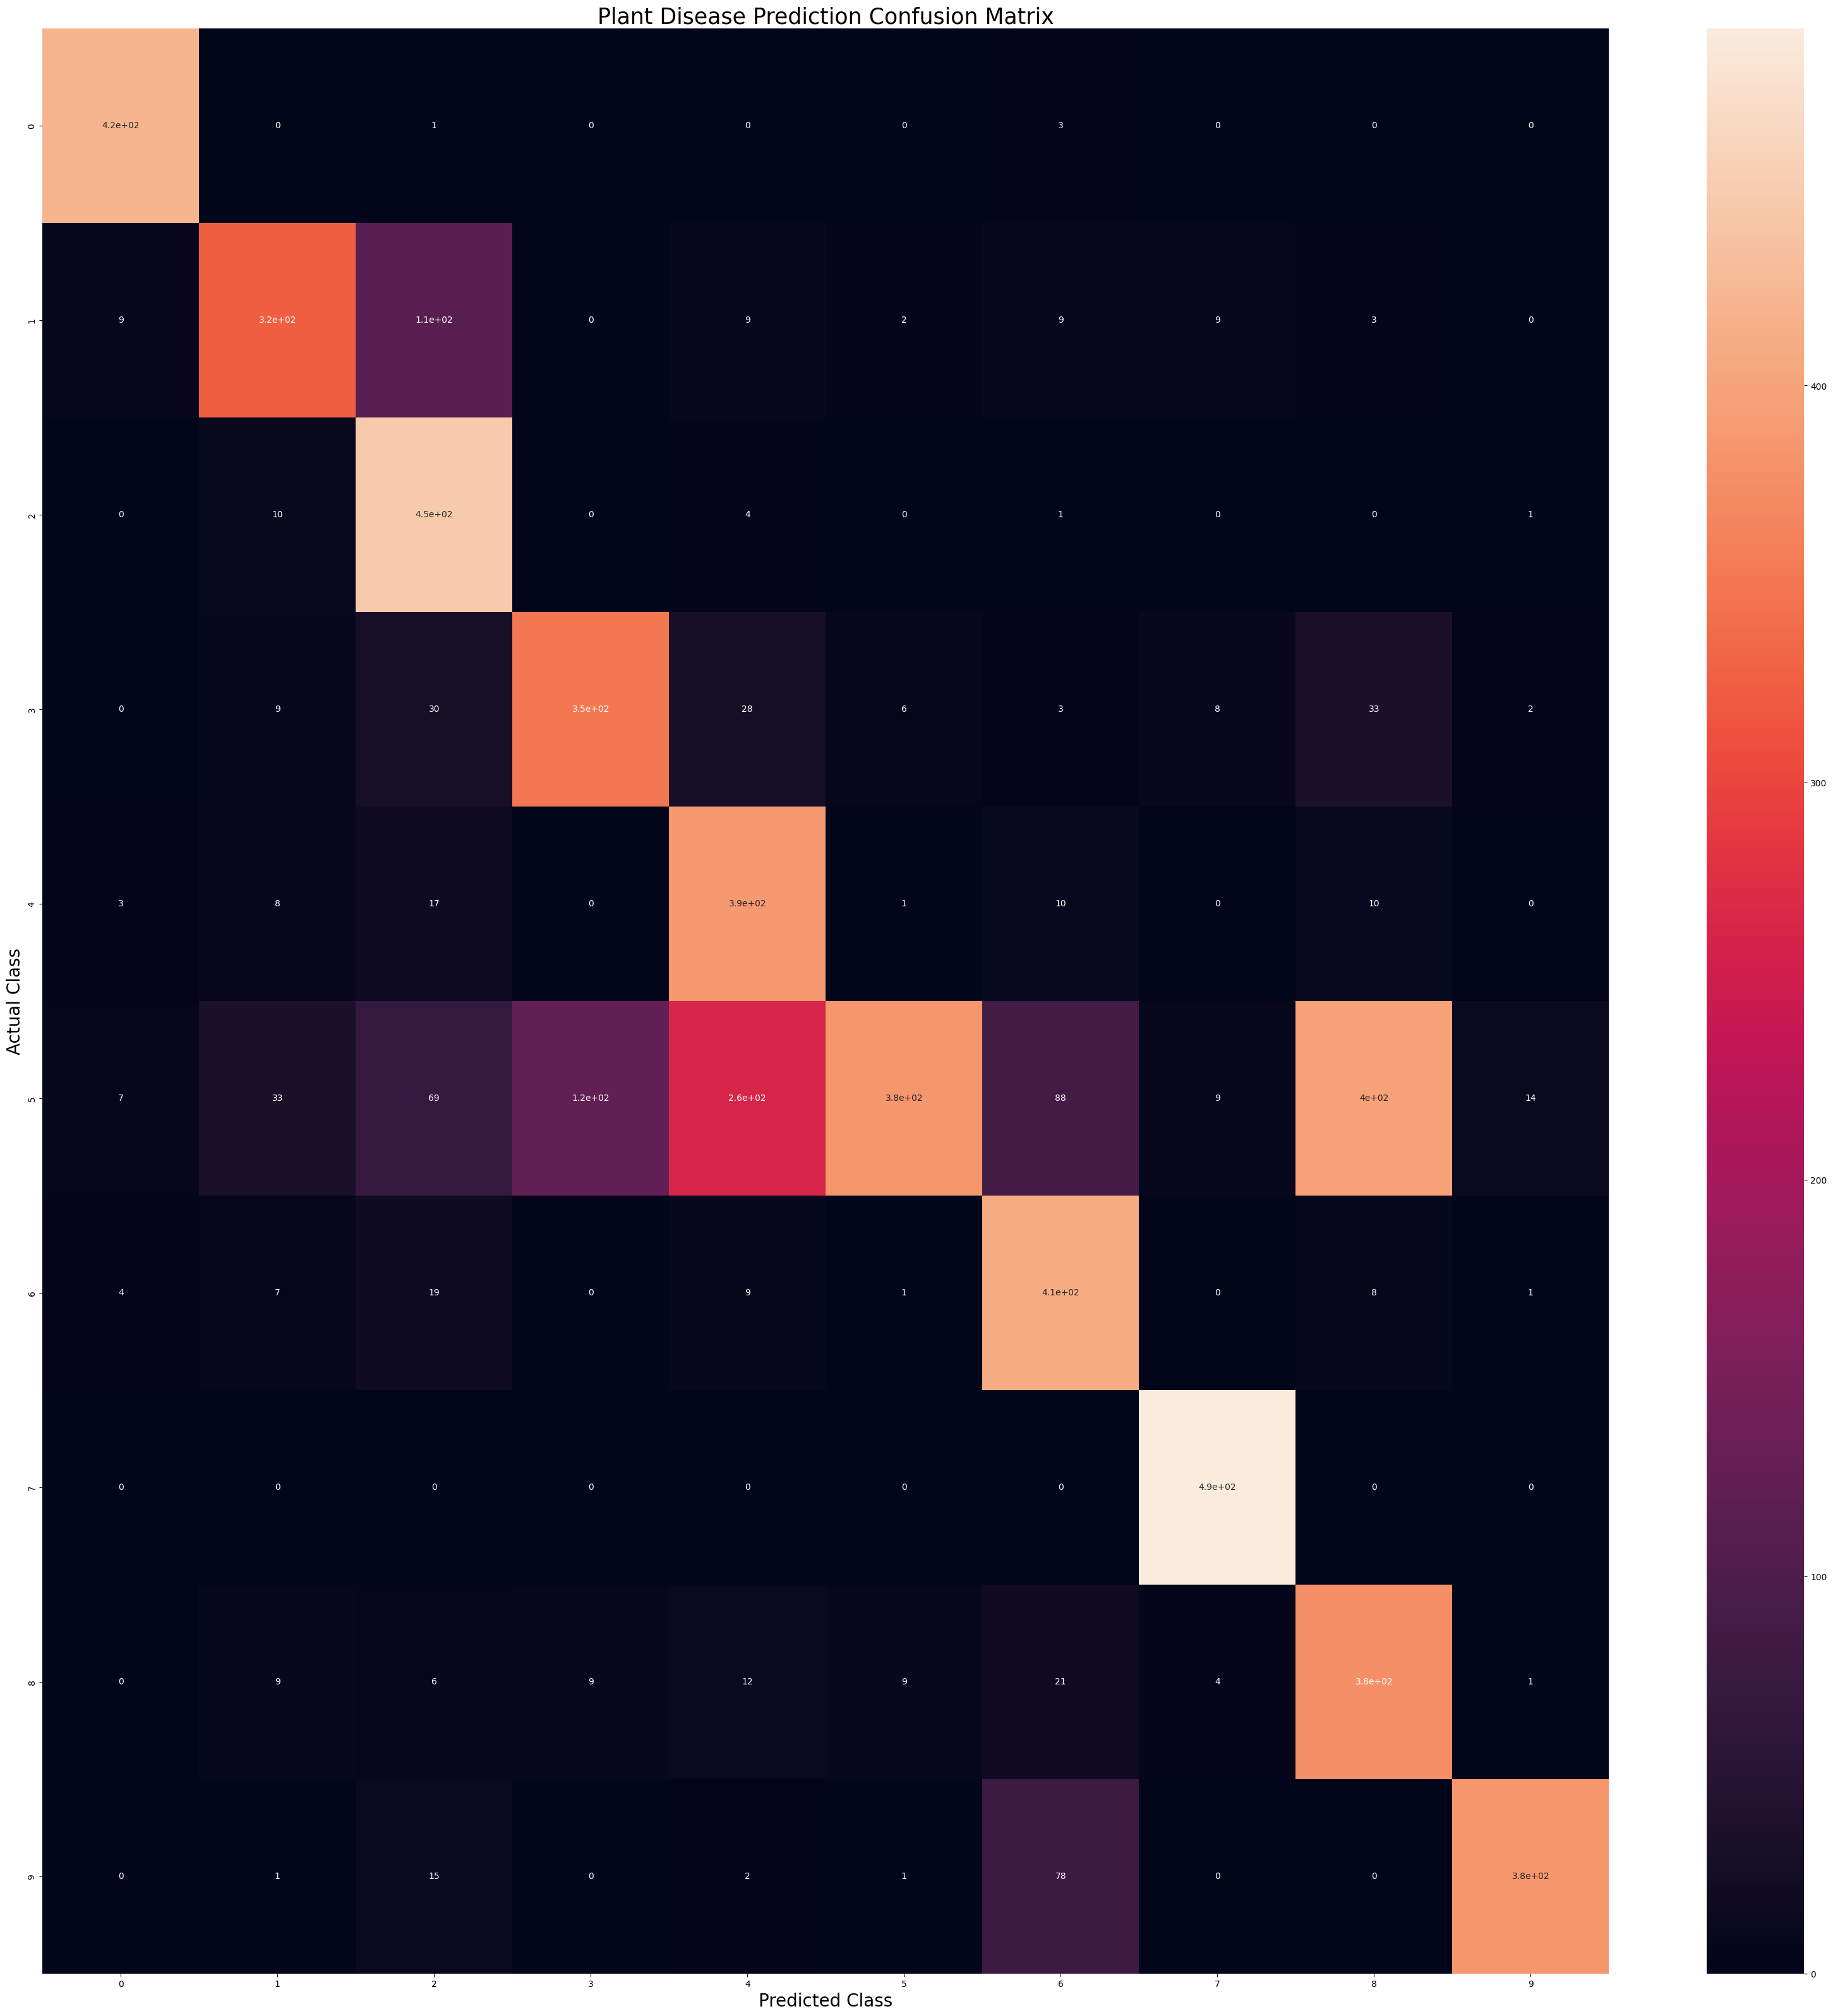

In [51]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()